#FACE MASK DETECTION

*   Name: Darren Carvalho


The following project aims at creating a CNN model to detect whether a mask is worn or not. And then using OpenCV to test the model in real time. 

Dataset url: https://github.com/prajnasb/observations/tree/master/experiements/data

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

## Preprocessing



*   Reading the images "With Mask" = 690, "Without Mask" = 698
*   Converting them to **Greyscale**
*   Set image size to **100 * 100**





In [ ]:
data_path = '/content/drive/MyDrive/open CV/data'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories, labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


### Examples of with and without masks

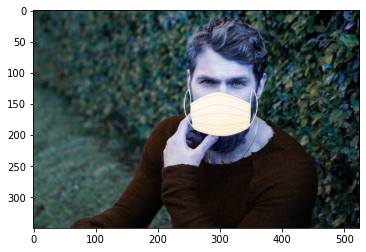

In [ ]:
with_mask_eg = cv2.imread('/content/drive/MyDrive/open CV/data/with_mask/0-with-mask.jpg')
plt.imshow(with_mask_eg)

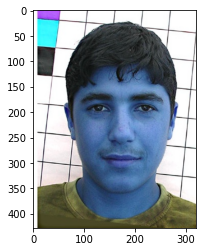

In [ ]:
without_mask_eg = cv2.imread('/content/drive/MyDrive/open CV/data/without_mask/19.jpg')
plt.imshow(without_mask_eg)

In [ ]:
## Iterate through both folders and read images and save the matrix
## values in data and the class label in target

img_size = 100
data = []
target = []

for category in categories:
  folder_path = os.path.join(data_path, category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)
  
    try:
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting to grey_scale

      resized = cv2.resize(gray, (img_size, img_size)) # Resize to 100*100

      data.append(resized) # Append data value
      target.append(label_dict[category]) # Append class 'mask', 'no mask'
    except Exception as e:
      print('Exception:', e)


In [ ]:
## Divide by 255 to scale b/w 0 and 1
## Reshape to (No of Images, 100, 100, 1 channel) 

data1 = np.array(data)/255.0
data1 = np.reshape(data1, (data1.shape[0], img_size, img_size, 1))
target1 = np.array(target)

new_target = np_utils.to_categorical(target1)

print("Shape of Images : ", data1.shape)
print("Target Shape", new_target.shape)
print("Data preview : ", data1[7])
print("Target Preview : ", new_target[0:5])

Shape of Images :  (1376, 100, 100, 1)
Target Shape (1376, 2)
Data preview :  [[[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 ...

 [[0.97254902]
  [0.34901961]
  [0.38039216]
  ...
  [0.45490196]
  [0.42352941]
  [0.99607843]]

 [[0.97647059]
  [0.30980392]
  [0.32941176]
  ...
  [0.44705882]
  [0.42352941]
  [0.99607843]]

 [[0.96470588]
  [0.2745098 ]
  [0.31372549]
  ...
  [0.45098039]
  [0.38039216]
  [0.99607843]]]
Target Preview :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
np.save('data_final', data1)
np.save('target_final', new_target)

In [ ]:
data1= np.load('/content/drive/MyDrive/open CV/data_final.npy')
new_target = np.load('/content/drive/MyDrive/open CV/target_final.npy')

## CNN Model


1.     200 Filters of order 3*3
2.     100 Filters of order 3*3
3.     Flatten Layer
4.     Dense Layer ( 50 )
5.     Dense Layer ( 2 )


In [ ]:
model = Sequential()

model.add(Conv2D(filters=200, kernel_size=(3,3), input_shape=data1.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))# First CNN 200 Filters, Relu, Maxpooling

model.add(Conv2D(filters=100, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))# Second CNN 100 Filters, Relu, Maxpooling

model.add(Flatten())# Flatten layer
model.add(Dropout(0.5)) # Dropout to prevent overfitting

model.add(Dense(50, activation='relu'))# Dense 50

model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data1, new_target, test_size=0.2)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(x_train, y_train, epochs=20, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/20
28/28 [==============================] - 8s 44ms/step - loss: 0.9515 - accuracy: 0.5130 - val_loss: 0.6931 - val_accuracy: 0.4773
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
28/28 [==============================] - 1s 23ms/step - loss: 0.6896 - accuracy: 0.5433 - val_loss: 0.6675 - val_accuracy: 0.4909
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
28/28 [==============================] - 1s 23ms/step - loss: 0.6172 - accuracy: 0.6141 - val_loss: 0.4809 - val_accuracy: 0.8045
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
28/28 [==============================] - 1s 23ms/step - loss: 0.4022 - accuracy: 0.8429 - val_loss: 0.4340 - val_accuracy: 0.8364
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
28/28 [==============================] - 1s 23ms/step - loss: 0.3135 - accuracy: 0.8903 - val_loss: 0.2824 - val_accuracy: 0.8955
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch

## Model Performance

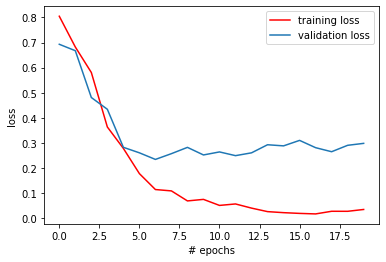

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

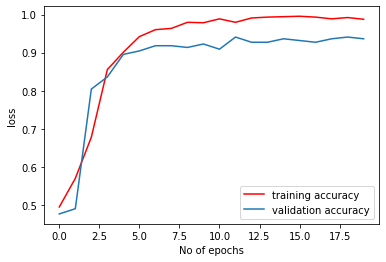

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('No of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(x_test,y_test))

9/9 [==============================] - 0s 16ms/step - loss: 0.2346 - accuracy: 0.9420
[0.23463019728660583, 0.9420289993286133]


In [ ]:
model.save('Model_Final.h5')

## Following JS code is to integrate Colab with Laptop web cam

Ref: https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

## OpenCv 



*   Face Cascade classifier to detect and extract the face
*   Capture a frame and predict



In [ ]:
model = load_model('/content/drive/MyDrive/OpenCV Face Mask Detection 19-PBD-022/Model_Final.h5')

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(255,0,0),1:(0,255,0)}


# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 

while (True):
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)

    for (x, y, w, h) in faces:
        face_img = gray[y:y + w, x:x + w]
        resized = cv2.resize(face_img, (100, 100))
        normalized = resized / 255.0
        reshaped = np.reshape(normalized, (1, 100, 100, 1))
        result = model.predict(reshaped)

        label = np.argmax(result, axis=1)[0]
        
        bbox_array = cv2.rectangle(bbox_array, (x, y - 40), (x + w, y), color_dict[label], -1)
        bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),color_dict[label],2)
        bbox_array = cv2.putText(bbox_array, labels_dict[label], (x, y - 10),
                                 cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)


    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
